# **K-Means Clustering**

**K-Means** is one of the most basic clustering algorithms. It relies on finding clusters to group data points based on minimizig **the sum of squared errors** between each data point and its cluster center.


**K-Means Clustering** is one of the most simple clustering algorithms. One of the limitations is that it depends on the starting point on the clusters and the number of clusters need to be defined beforehand

In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.utils import shuffle
from sklearn.datasets import make_blobs

import warnings
warnings.filterwarnings("ignore")

### Lets create simple dataset:

In [186]:
plt.rcParams["figure.figsize"]=[5,5]
sns.set_style("whitegrid")
sns.set_context("talk")

In [187]:
def display_clusters(X,km=(),num_clusters=0):
    color="brgcmyk"
    alpha=0.5
    s=20
    plt.gca().set_aspect("equal")
    if num_clusters==0:
        plt.scatter(X[:,0],X[:,1],c=color[0],alpha=alpha,s=s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c=color[i],alpha=alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c=color[i],marker="x",s=100)

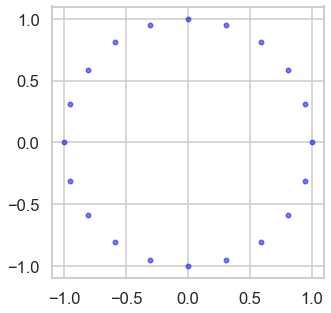

In [188]:
angle=np.linspace(0,2*np.pi,20,endpoint=False)
X=np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_clusters(X)

### Now group this data into two clusters, random_state=10

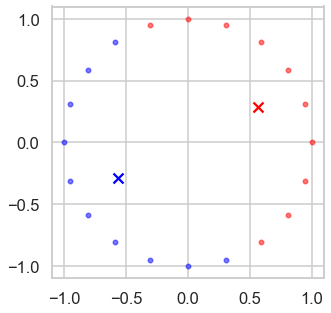

In [189]:
num_clusters=2
km=KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init -> number of times K-Means will run
km.fit(X)
display_clusters(X,km,num_clusters)

### Now group this data into two clusters, random_state=20

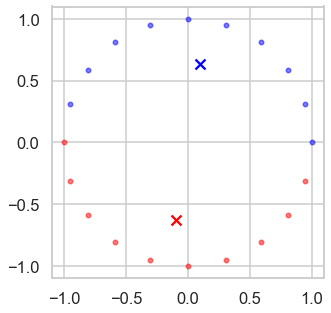

In [190]:
num_clusters=2
km=KMeans(n_clusters=num_clusters,random_state=20,n_init=1) # n_init -> number of times K-Means will run
km.fit(X)
display_clusters(X,km,num_clusters)

##### Why clusters change when we change random_state?

* Because the starting points of cluster centers have an impact on where final clusters lie. Starting point of clusters is conttrolled by **random_state**

# DETERMINING OPTIMUM NUMBER of CLUSTERS

### Lets create a new dataset:

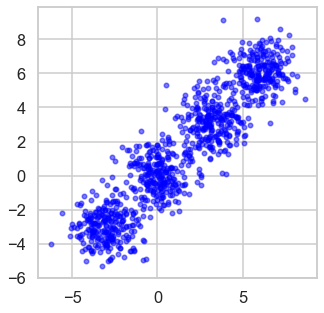

In [191]:
n_samples=1000
n_bins=4
centers=[(-3,-3),(0,0),(3,3),(6,6)]
X,y=make_blobs(n_samples=n_samples,shuffle=False,n_features=2,cluster_std=1.0,centers=centers,random_state=42)
display_clusters(X)

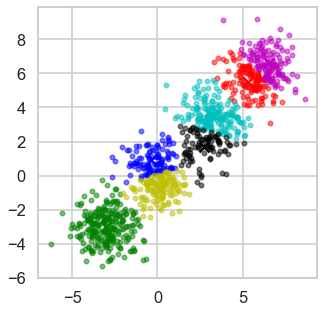

In [192]:
num_clusters=7
km=KMeans(n_clusters=num_clusters)
km.fit(X)
display_clusters(X,km,num_clusters)

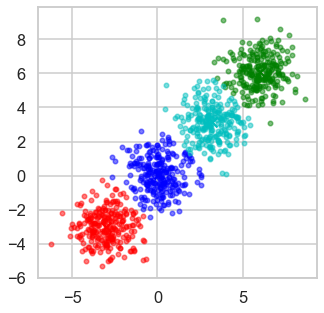

In [193]:
num_clusters=4
km=KMeans(n_clusters=num_clusters)
km.fit(X)
display_clusters(X,km,num_clusters)

**inetria:**: Sum of squared error between each point and its cluster center as a function of number of clusters.

In [194]:
km.inertia_

1880.1744022775615

#### Lets calculate and plot inertia for 1 to 10 clusters:

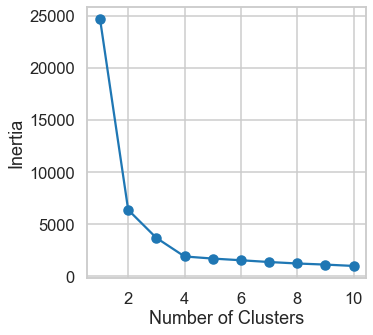

In [195]:
inertia=[]
list_num_clusters=list(range(1,11))

for num_clusters in list_num_clusters:
    km=KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia");

###### We see on the plot, that inertia continues to go down as you increase the number of clusters essentially. We see that the inertia continues to go down. But they don't go down as quickly once we hit that four. So that's our **inflection point** , and we say that we should probably use four clusters. 

# **CLUSTERING COLORS from IMAGE**

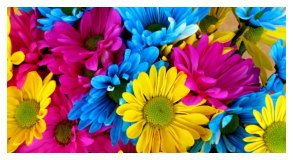

In [196]:
img=plt.imread("flowers.jpg")
plt.imshow(img)
plt.axis("off");

In [197]:
img.shape

(628, 1200, 3)

* Image has 628 pixels in height
* 1200 pixels in width
* Each pixel has 3 values

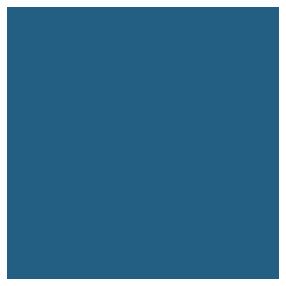

In [198]:
# Assign RGB values:
R=35
G=95
B=131
plt.imshow([[np.array([R,G,B]).astype("uint8")]])
plt.axis("off");

* B has highest valus so we see only blue, If change the values you will see.

In [199]:
img_flat=img.reshape(img.shape[0]*img.shape[1],3)
img_flat[:5,:]

array([[198, 132,  20],
       [199, 134,  18],
       [195, 135,  11],
       [189, 132,   1],
       [182, 131,   0]], dtype=uint8)

* 628 x 1200 pixels. We have 753600 rows!

In [200]:
img_flat.shape

(753600, 3)

#### Lets create K-Means with 8 clusters:

In [201]:
kmeans=KMeans(n_clusters=8,random_state=0).fit(img_flat)

#### Replace each row with its closest cluster center:

In [202]:
img_flat2=img_flat.copy()

for i in np.unique(kmeans.labels_):
    img_flat2[kmeans.labels_==i,:]=kmeans.cluster_centers_[i]

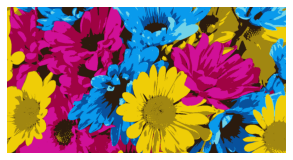

In [203]:
img2=img_flat2.reshape(img.shape)
plt.imshow(img2)
plt.axis("off");

#### Lets write a function that receives image and number of clusters:

In [204]:
def image_cluster(img,k):
    img_flat=img.reshape(img.shape[0]*img.shape[1],3)
    kmeans=KMeans(n_clusters=k,random_state=0).fit(img_flat)
    img_flat2=img_flat.copy()
    
    for i in np.unique(kmeans.labels_):
        img_flat2[kmeans.labels_==i,:]=kmeans.cluster_centers_[i]
        
    img2=img_flat2.reshape(img.shape)
    return img2,kmeans.inertia_

In [205]:
k_values=list(range(2,21,2))
img_list=[]
inertia=[]

for k in k_values:
    img2,ine= image_cluster(img,k)
    img_list.append(img2)
    inertia.append(ine)

Text(0, 0.5, 'Inertia')

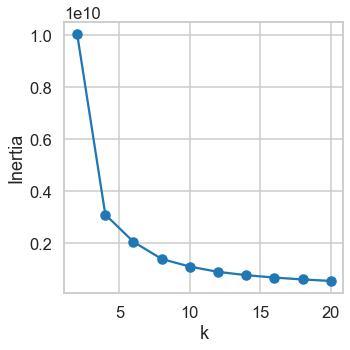

In [206]:
plt.plot(k_values,inertia)
plt.scatter(k_values,inertia)
plt.xlabel("k")
plt.ylabel("Inertia")

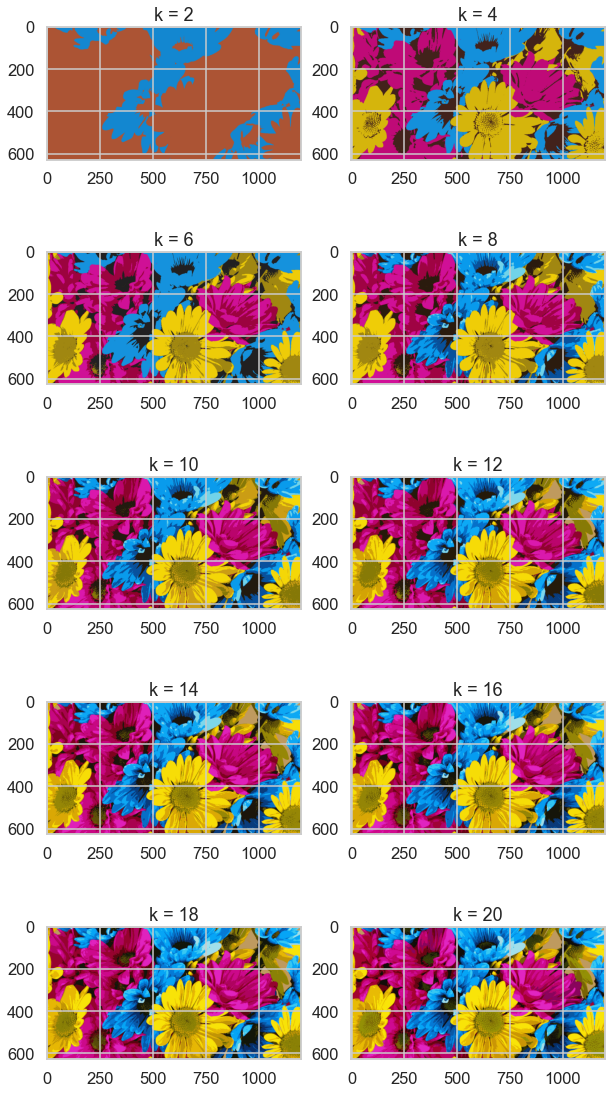

In [207]:
plt.figure(figsize=[10,20])
for i in range(len(k_values)):
    plt.subplot(5,2,i+1)
    plt.imshow(img_list[i])
    plt.title("k = " + str(k_values[i]))